In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams
import scipy
rcParams['figure.figsize'] = 20, 10

In [3]:
# test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')
test=pd.read_csv('E:/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [4]:
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

C:\Users\atif\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [5]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [6]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [7]:
test_new = test_new.set_index('dateTime') # make dataTime column as index of the dataframe test_new

In [8]:
# multivariate_column_label=['DEWIHOBT9_I0','AEDATZ_HO_V0','AEDAHO_T9_V2','AEWIHO_T9AV2','RWWIHOB_HWT0'
#                            ,'RWWIHOB_MWT0']#rmse error 1.99

# multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0',
#                              'AEDAHO_T9_V2','AEWIHO_T9AV2'] #rmse error 1.38

multivariate_column_label = ['DEWIHOBT9_I0','AEDATZ_HONP0','AEDATZK_ASP0','AEDATZ_HO_V0','AEDAHO_T9_V2',
                             'RWWIHOB_HWT0','RWWIHOB_MWT0','AEWIHO_T9AV2'] #rmse error 1.94
size_column = len(multivariate_column_label)
print(size_column)

8


In [9]:
multivariate_data=test_new.iloc[2000:10000][multivariate_column_label]
multivariate_data=multivariate_data.loc[::-1]
print(multivariate_data.head())

                     DEWIHOBT9_I0  AEDATZ_HONP0  AEDATZK_ASP0  AEDATZ_HO_V0  \
dateTime                                                                      
2019-04-01 10:41:00         100.0     97.700539     97.882738     40.370434   
2019-04-01 10:42:00         100.0     97.602208     97.759636     40.216788   
2019-04-01 10:43:00         100.0     97.434917     97.576584     39.823313   
2019-04-01 10:44:00         100.0     96.856201     97.025646     39.922763   
2019-04-01 10:45:00         100.0     96.748572     96.909181     39.771485   

                     AEDAHO_T9_V2  RWWIHOB_HWT0  RWWIHOB_MWT0  AEWIHO_T9AV2  
dateTime                                                                     
2019-04-01 10:41:00     71.079345     94.396188     95.197505     79.651755  
2019-04-01 10:42:00     70.706495     94.318615     95.151028     77.686548  
2019-04-01 10:43:00     70.289996     94.031510     94.982774     76.496477  
2019-04-01 10:44:00     69.994697     94.286623     95.1

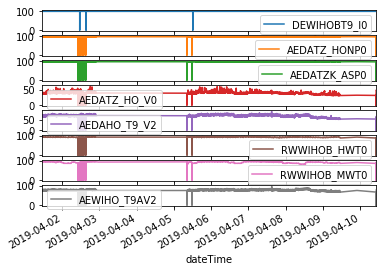

In [10]:
ax = multivariate_data.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
# plt.savefig('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/images_from_training/multivariate_data_regression.png')
# plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# Below the row has deleted where DEWIHOBT9_I0 has 'zero' value

In [11]:
zero_index=[]
zero_index=np.array(zero_index)
for index, value in multivariate_data.iterrows():
    for i , v in enumerate(value):
        if i == 0  and v == 0.0:
#             print('index: ',index)
            zero_index=np.append(zero_index,index)

print('size of zero_index: ',zero_index.size)

size of zero_index:  5


In [12]:
if zero_index.size > 0:
    multivariate_data_modify = multivariate_data.drop(zero_index,axis=0) # axis= 0 means row indiated. 1 means column indicated
else:
    multivariate_data_modify = multivariate_data

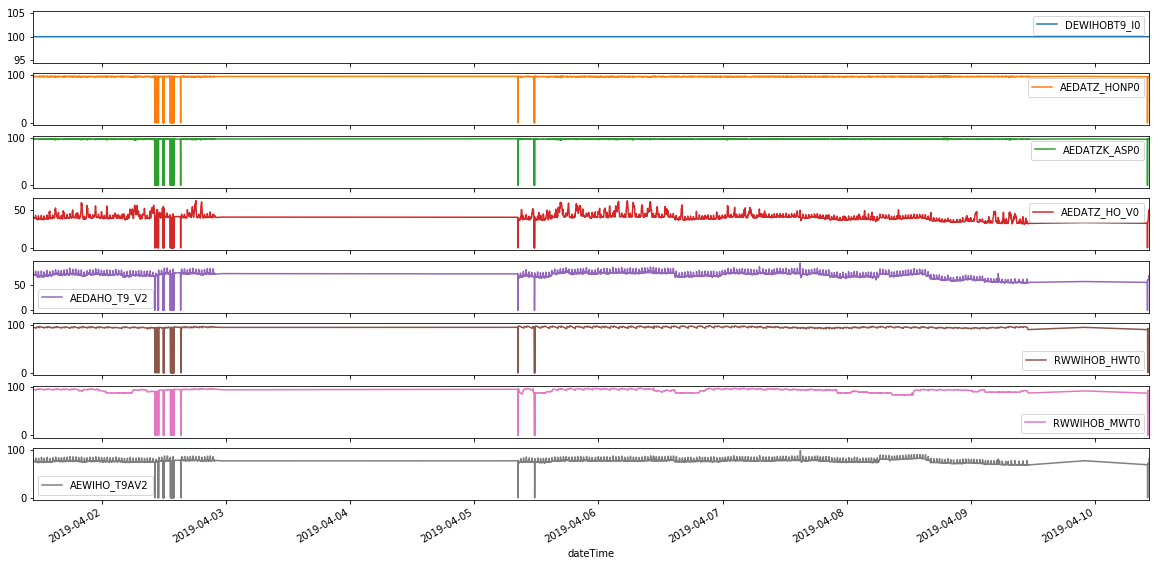

In [12]:
bx = multivariate_data_modify.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# Below the row will be deleted where any value of any column will be zero

In [13]:
from numpy import nan
multivariate_data_drop_zero= multivariate_data_modify.replace(0,nan)
multivariate_data_drop_zero=multivariate_data_drop_zero.dropna(how='any',axis=0)

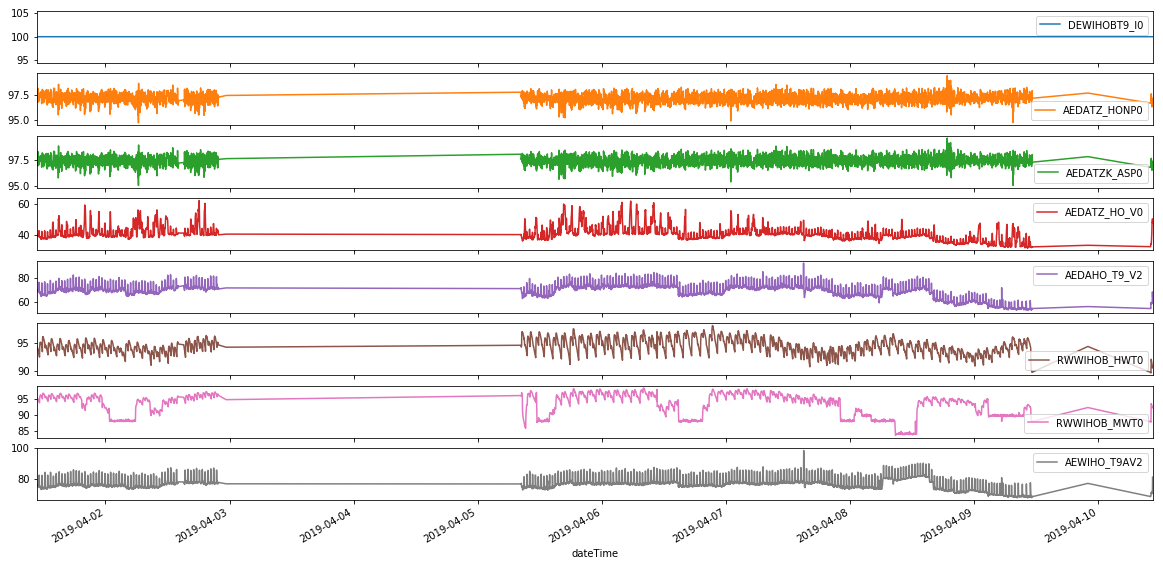

In [14]:
cx = multivariate_data_drop_zero.plot(subplots=True, layout=(size_column,1))
# plt.legend(loc='upper left')
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [14]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_modify: ', multivariate_data_modify.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)

shape of multivariate_data:  (8000, 8)
shape of multivariate_data_modify:  (7995, 8)
shape of multivariate_data_drop_zero:  (7937, 8)


In [15]:
# # remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
# multi_mean=multivariate_data.mean()
# multivariate_data_mean= multivariate_data.replace(0,multi_mean)

In [16]:
# multivariate_data_mean.plot()
# plt.show()

In [17]:
multivariate_data_drop_zero_resample = multivariate_data_drop_zero.resample('1min').mean()

In [18]:
print(multivariate_data_drop_zero.shape)
print(multivariate_data_drop_zero_resample.shape)

(7937, 8)
(12951, 8)


In [19]:
multivariate_data_drop_zero_interpolate = multivariate_data_drop_zero_resample.interpolate('linear')
print(multivariate_data_drop_zero_interpolate.shape)

(12951, 8)


In [20]:
multivariate_data_drop_zero_interpolate.head()

,DEWIHOBT9_I0,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
dateTime,,,,,,,,
2019-04-01 10:41:00,100.0,97.700539,97.882738,40.370434,71.079345,94.396188,95.197505,79.651755
2019-04-01 10:42:00,100.0,97.602208,97.759636,40.216788,70.706495,94.318615,95.151028,77.686548
2019-04-01 10:43:00,100.0,97.434917,97.576584,39.823313,70.289996,94.031510,94.982774,76.496477
2019-04-01 10:44:00,100.0,96.856201,97.025646,39.922763,69.994697,94.286623,95.170256,76.661633
2019-04-01 10:45:00,100.0,96.748572,96.909181,39.771485,70.138749,94.273834,95.158246,76.051026


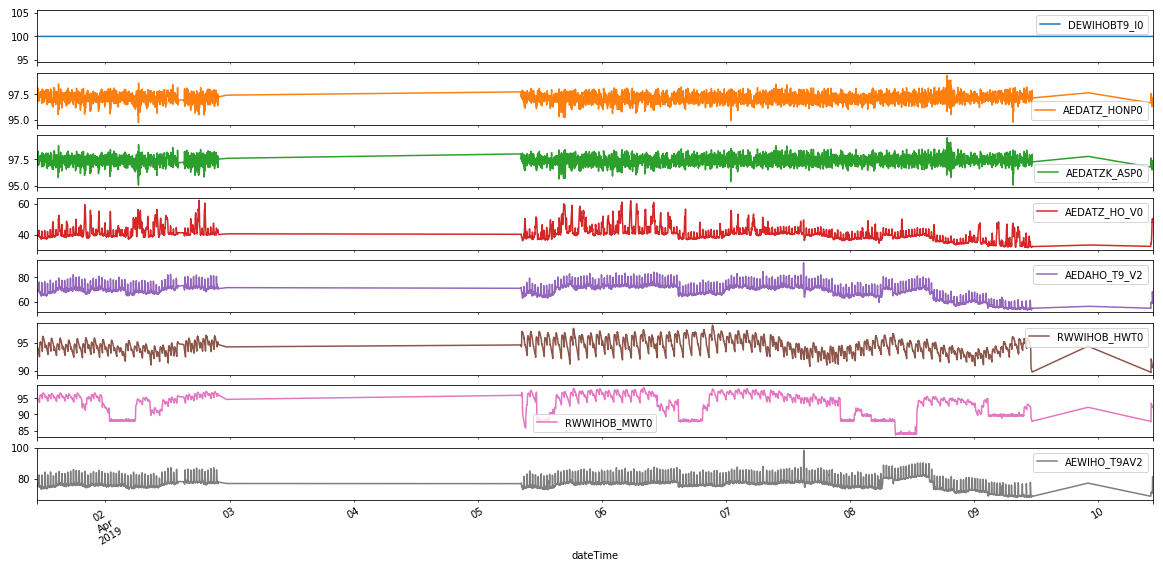

In [22]:
dx = multivariate_data_drop_zero_interpolate.plot(subplots=True, layout=(size_column,1))
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

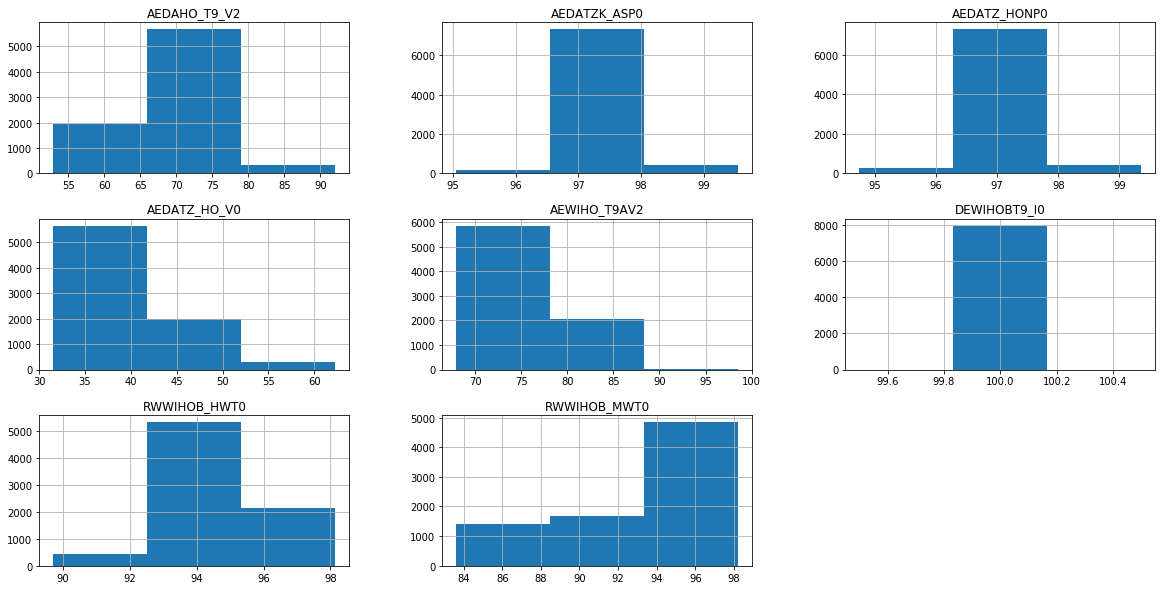

In [21]:
hist = multivariate_data_drop_zero.hist(bins=3)

# following cell will remove the row who has same value consecutively

In [22]:
# print(len(multivariate_column_label))
for idx, i in enumerate(multivariate_column_label):
    now_idx = idx+1
    
    if now_idx == len(multivariate_column_label):
        print('terminate')
        break
    print(multivariate_column_label[now_idx])
    drop_consecutive_same_value_zero = multivariate_data_drop_zero.loc[multivariate_data_drop_zero[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero[multivariate_column_label[now_idx]]]
    drop_consecutive_same_value_interpolate = multivariate_data_drop_zero_interpolate.loc[multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]].shift() != multivariate_data_drop_zero_interpolate[multivariate_column_label[now_idx]]]
    


AEDATZ_HONP0
AEDATZK_ASP0
AEDATZ_HO_V0
AEDAHO_T9_V2
RWWIHOB_HWT0
RWWIHOB_MWT0
AEWIHO_T9AV2
terminate


In [23]:
print(multivariate_data_drop_zero.shape)
print(drop_consecutive_same_value_zero.shape)
print(drop_consecutive_same_value_interpolate.shape)

(7937, 8)
(7930, 8)
(12944, 8)


In [24]:
new_dataframe = drop_consecutive_same_value_zero.drop(['DEWIHOBT9_I0'], axis=1)
# new_dataframe = drop_consecutive_same_value_interpolate.drop(['DEWIHOBT9_I0'], axis=1)

In [25]:
print('shape of multivariate_data: ',multivariate_data.shape)
print('shape of multivariate_data_modify: ', multivariate_data_modify.shape)
print('shape of multivariate_data_drop_zero: ',multivariate_data_drop_zero.shape)
print('shape of new_dataframe: ', new_dataframe.shape)

shape of multivariate_data:  (8000, 8)
shape of multivariate_data_modify:  (7995, 8)
shape of multivariate_data_drop_zero:  (7937, 8)
shape of new_dataframe:  (7930, 7)


In [26]:
new_dataframe.corr()

,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2
AEDATZ_HONP0,1.000000,0.986607,-0.375157,-0.161240,-0.052884,-0.066476,-0.042117
AEDATZK_ASP0,0.986607,1.000000,-0.303132,-0.108016,-0.045979,-0.045416,0.018198
AEDATZ_HO_V0,-0.375157,-0.303132,1.000000,0.612193,0.142894,0.269080,0.395302
AEDAHO_T9_V2,-0.161240,-0.108016,0.612193,1.000000,0.149537,0.359298,0.768550
RWWIHOB_HWT0,-0.052884,-0.045979,0.142894,0.149537,1.000000,0.246607,-0.005621
RWWIHOB_MWT0,-0.066476,-0.045416,0.269080,0.359298,0.246607,1.000000,0.104084
AEWIHO_T9AV2,-0.042117,0.018198,0.395302,0.768550,-0.005621,0.104084,1.000000


In [27]:
new_dataframe_1 = new_dataframe.drop(['RWWIHOB_HWT0','RWWIHOB_MWT0'], axis=1)

In [28]:
# print('multivariate_data_drop_zero head: \n',multivariate_data_drop_zero.head())
# dataset=np.array(multivariate_data_drop_zero)
dataset=np.array(new_dataframe_1)
new_dataframe_1.head()

,AEDATZ_HONP0,AEDATZK_ASP0,AEDATZ_HO_V0,AEDAHO_T9_V2,AEWIHO_T9AV2
dateTime,,,,,
2019-04-01 10:41:00,97.700539,97.882738,40.370434,71.079345,79.651755
2019-04-01 10:42:00,97.602208,97.759636,40.216788,70.706495,77.686548
2019-04-01 10:43:00,97.434917,97.576584,39.823313,70.289996,76.496477
2019-04-01 10:44:00,96.856201,97.025646,39.922763,69.994697,76.661633
2019-04-01 10:45:00,96.748572,96.909181,39.771485,70.138749,76.051026


In [31]:
# # remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
# multi_mean=multivariate_data.mean()
# multivariate_data_mean= multivariate_data.replace(0,multi_mean)

In [32]:
# multivariate_data_mean.plot()
# plt.show()

In [33]:
# from sklearn import preprocessing

# min_max_scaler = preprocessing.MinMaxScaler()
# np_scaled = min_max_scaler.fit_transform(multivariate_data_mean)

# df_normalized = pd.DataFrame(np_scaled,index=multivariate_data.index,columns=multivariate_column_label)

In [29]:
def make_dataset(dataset):
    NumberOfElements=int(len(dataset)*0.9)
    print('dataset length: ',len(dataset))
    print('Number of Elements for training: ',NumberOfElements)

    multiple_ip_train_data=dataset[0:NumberOfElements]
    print(multiple_ip_train_data.shape)
    multiple_ip_test_set=dataset[NumberOfElements:len(dataset)]
    print(multiple_ip_test_set.shape)
    
    return multiple_ip_train_data, multiple_ip_test_set

multiple_ip_train_data, multiple_ip_test_set = make_dataset(dataset)

dataset length:  7930
Number of Elements for training:  7137
(7137, 5)
(793, 5)


In [42]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [31]:
 # split a univariate sequence into samples
def split_sequence(sequence, n_steps_1):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_1
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix,:-1], sequence[end_ix,-1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [38]:
n_steps_1 = 4
# split into samples
X_ip_cnn_lstm, Y_op_cnn_lstm = split_sequence(multiple_ip_train_data, n_steps_1)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]

In [39]:
print('X_ip_cnn_lstm shape: ',X_ip_cnn_lstm.shape,'\tX_ip_cnn_lstm size: ',X_ip_cnn_lstm.size,'\tX_ip_cnn_lstm dimension: ',X_ip_cnn_lstm.ndim)
print('Y_op_cnn_lstm shape: ',Y_op_cnn_lstm.shape,'\tY_op_cnn_lstm size: ',Y_op_cnn_lstm.size,'\tY_op_cnn_lstm dimension: ',Y_op_cnn_lstm.ndim)

X_ip_cnn_lstm shape:  (7133, 4, 4) 	X_ip_cnn_lstm size:  114128 	X_ip_cnn_lstm dimension:  3
Y_op_cnn_lstm shape:  (7133,) 	Y_op_cnn_lstm size:  7133 	Y_op_cnn_lstm dimension:  1


In [40]:
n_features = X_ip_cnn_lstm.shape[-1]
n_seq = round(n_steps_1/2)
n_steps_2 = round(n_steps_1/2)
train_ip_cnn_lstm = X_ip_cnn_lstm.reshape((X_ip_cnn_lstm.shape[0], n_seq, n_steps_2, n_features))

In [41]:
print('train_ip_cnn_lstm shape: ',train_ip_cnn_lstm.shape,'\ttrain_ip_cnn_lstm size: ',
      train_ip_cnn_lstm.size,'\ttrain_ip_cnn_lstm dimension: ',train_ip_cnn_lstm.ndim)

train_ip_cnn_lstm shape:  (7133, 2, 2, 4) 	train_ip_cnn_lstm size:  114128 	train_ip_cnn_lstm dimension:  4


#  without using validation split you cannot save the best model. Then you can use False instead of True in the return of save_best_only argument

In [43]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

In [44]:
# define model
def cnn_lstm():
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps_2, n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    #a = TimeDistributed(Flatten())
    #print(a)
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    return model
cnn_lstm=cnn_lstm()
cnn_lstm.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

# fit model
# cnn_lstm.fit(train_ip_cnn_lstm,Y_op_cnn_lstm,batch_size=batch_size, epochs=epochs, verbose=1,
#          callbacks=[LearningRateScheduler(lr_schedule),
#                      ModelCheckpoint('E:/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/hh_30.h5',
#                                      save_best_only = True)])

In [45]:
cnn_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_1 (TimeDist (None, None, 2, 64)       320       
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 1, 64)       0         
_________________________________________________________________
time_distributed_3 (TimeDist (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                23000     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 23,371
Trainable params: 23,371
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = cnn_lstm.fit(train_ip_cnn_lstm,Y_op_cnn_lstm,batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/30
7133/7133 [==============================] - 2s 234us/step - loss: 604.5657 - acc: 0.0000e+00
Epoch 2/30
7133/7133 [==============================] - 1s 94us/step - loss: 4.5654 - acc: 0.0000e+00
Epoch 3/30
7133/7133 [==============================] - 1s 93us/step - loss: 3.5820 - acc: 0.0000e+00
Epoch 4/30
7133/7133 [==============================] - 1s 96us/step - loss: 3.4999 - acc: 0.0000e+00
Epoch 5/30
7133/7133 [==============================] - 1s 102us/step - loss: 3.3461 - acc: 0.0000e+00
Epoch 6/30
7133/7133 [==============================] - 1s 97us/step - loss: 3.1815 - acc: 0.0000e+00
Epoch 7/30
7133/7133 [==============================] - 1s 125us/step - loss: 3.2514 - acc: 0.0000e+00
Epoch 8/30
7133/7133 [==============================] - ETA: 0s - loss: 3.1394 - acc: 0.0000e+0 - 1s 121us/step - loss: 3.1374 - acc: 0.0000e+00
Epoch 9/30
7133/7133 [==============================] - 1s 106us/step - loss: 3.0408 - acc: 0.0000e+00
Epoch 10/30
7133/7133 [==========

In [44]:
# print(history.history.keys())
# # summarize history for accuracy
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# # summarize history for loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

In [47]:
X_CNN_Lstm_test, y_CNN_Lstm_test = split_sequence(multiple_ip_test_set, n_steps_1)

x_input = X_CNN_Lstm_test.reshape((X_CNN_Lstm_test.shape[0], n_seq, n_steps_2, X_CNN_Lstm_test.shape[-1]))

In [48]:
print(x_input.shape)

(789, 2, 2, 4)


In [49]:
# from keras.models import load_model

# load_trained_model=load_model('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/CNN_LSTM_norm_30.h5')

yhat = cnn_lstm.predict(x_input, verbose=1)
# print(yhat)

789/789 [==============================] - 0s 186us/step


In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from statsmodels import robust

In [52]:
#Print MSE to see how good the model is
Error = mean_squared_error(y_CNN_Lstm_test,yhat)
MAE = mean_absolute_error(y_CNN_Lstm_test, yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
print('MAE: ', MAE)
MAD = robust.mad(yhat)
print('MAD: ',MAD)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE = mean_absolute_percentage_error(y_CNN_Lstm_test, yhat)
print('MAPE: ', MAPE)

mean squared error:  7.376783912590372
RMSE Error:  2.71602354787111
MAE:  2.5276583762554528
MAD:  [0.9242171]
MAPE:  4.233374116296986


In [54]:
# print(y_CNN_Lstm_test.ndim)
# print(yhat.ndim)
y_1 = np.reshape(y_CNN_Lstm_test,(y_CNN_Lstm_test.shape[0],1))
print('y_1 shape: ',y_1.shape)
print('y_1 dimension: ',y_1.ndim)


Error = mean_squared_error(y_1,yhat)
MAE = mean_absolute_error(y_1, yhat)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
print('MAE: ', MAE)
MAD = robust.mad(yhat)
print('MAD: ',MAD)


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE = mean_absolute_percentage_error(y_1, yhat)
print('MAPE: ', MAPE)

MAPE_1 = mean_absolute_percentage_error(y_CNN_Lstm_test, yhat)
print('MAPE_1: ', MAPE_1)

y_1 shape:  (789, 1)
y_1 dimension:  2
mean squared error:  7.376783912590372
RMSE Error:  2.71602354787111
MAE:  2.5276583762554528
MAD:  [0.9242171]
MAPE:  3.5775042125525207
MAPE_1:  4.233374116296986


In [55]:
predicted_output = yhat
test_output = y_CNN_Lstm_test

print(predicted_output.shape)
print(test_output.shape)

test_output = np.reshape(test_output,(-1,1))
print(test_output.shape)

(789, 1)
(789,)
(789, 1)


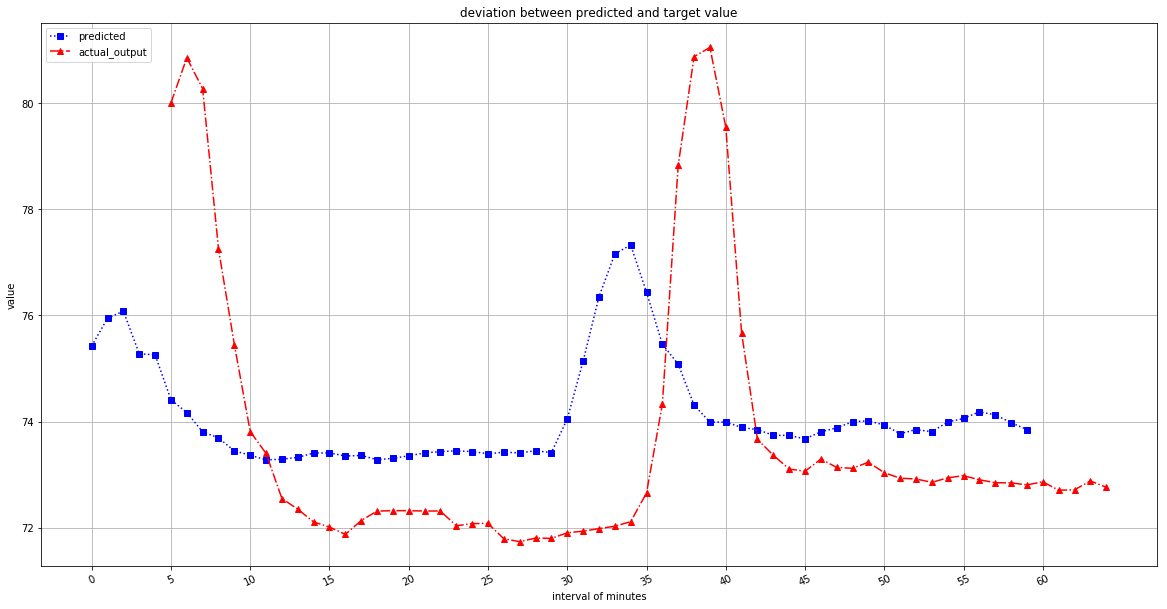

In [56]:
actual_data = range(65)


plt.plot(predicted_output[:60],color='blue',marker='s', linestyle=':')
plt.plot(actual_data[5:], test_output[:60],color='red',marker='^', linestyle='-.')
# plt.plot(yhat[51:99],color='black',marker='s', linestyle=':')
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('interval of minutes')
plt.legend(['predicted','actual_output'], loc='upper left')
plt.grid(b=None, which='both', axis='both')
plt.xticks(np.arange(0,65,5))
plt.xticks( rotation=25)
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

<class 'numpy.ndarray'>


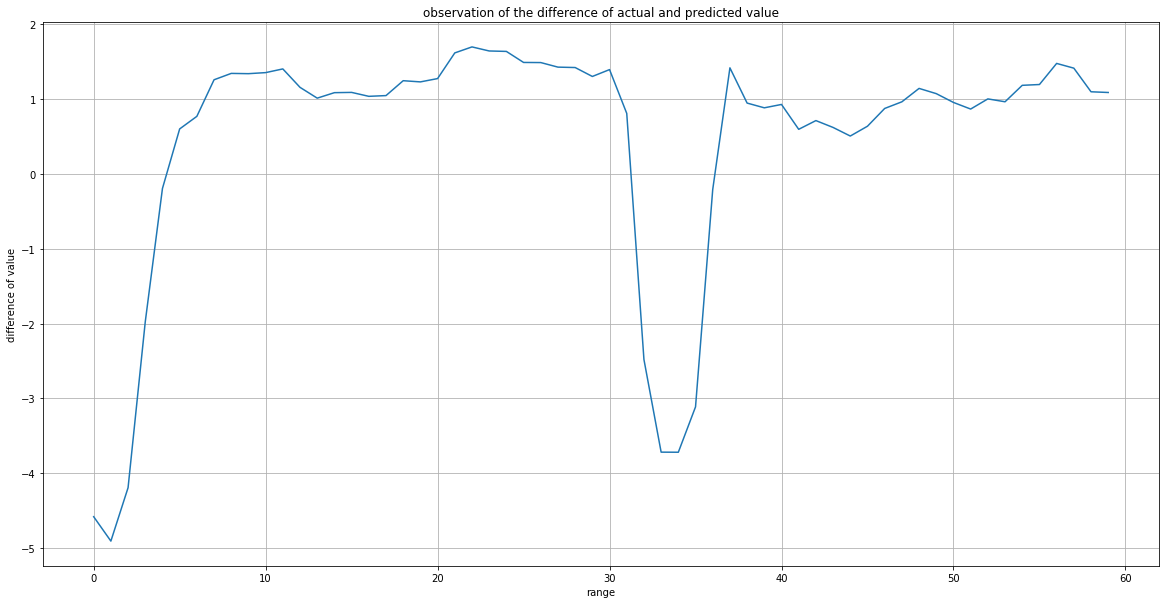

In [57]:
# try to draw a graph where I will plot only the differences between actual and predicted value.
# %matplotlib qt

difference_of_value = predicted_output - test_output
print(type(difference_of_value))

plt.plot(difference_of_value[0:60])
plt.title('observation of the difference of actual and predicted value')

# plt.rcParams['xtick.labelsize']=2
# plt.rcParams['ytick.labelsize']=2
# plt.tick_params(labelsize=20)
plt.ylabel('difference of value')
plt.xlabel('range')
plt.grid(b=None, which='both', axis='both')
# plt.savefig('difference_of_actual_and_predicted_value.png')
plt.show()

In [61]:
# plt.hist(difference_of_value, bins=20)
# # plt.xlim(-10,10,1)
# plt.show()

def count_each_number(difference_array):
    count_greater_6 = 0
    count_5_to_6 = 0
    count_4_to_5 = 0
    count_3_to_4 = 0
    count_2_to_3 = 0
    count_1_to_2 = 0
    count_less_1 = 0

    for i in difference_of_value:
        if i >= 6:
            count_greater_6 +=1
        if 5<=i<6:
            count_5_to_6 +=1
        if 4<=i<5:
            count_4_to_5 +=1
        if 3<=i<4:
            count_3_to_4 +=1
        if 2<=i<3:
            count_2_to_3 +=1
        if 1<=i<2:
            count_1_to_2 +=1
        if i<1:
            count_less_1 +=1
    print(count_greater_6)
    print(count_5_to_6)
    print(count_4_to_5)
    print(count_3_to_4)
    print(count_2_to_3)
    print(count_1_to_2)
    print(count_less_1)
    
count_each_number(difference_of_value)

0
0
28
231
220
176
134


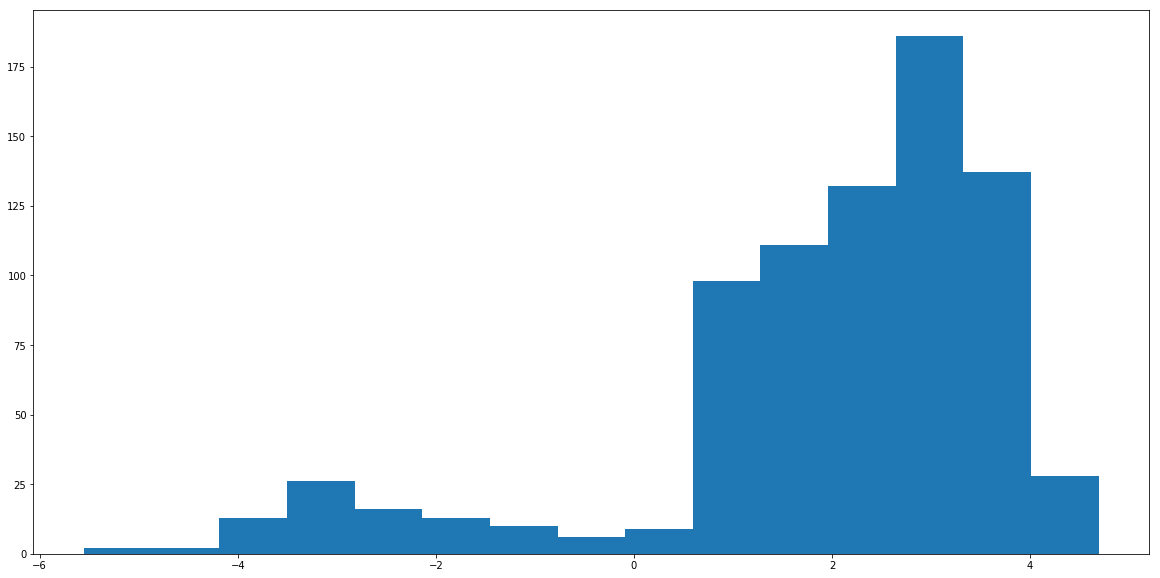

In [59]:
plt.hist(difference_of_value, bins=15)
# plt.xlim(-10,10,1)
plt.show()

high:  789
min : [67.94608028]  and max:  [81.38228262]
min : [68.89982]  and max:  [75.989876]


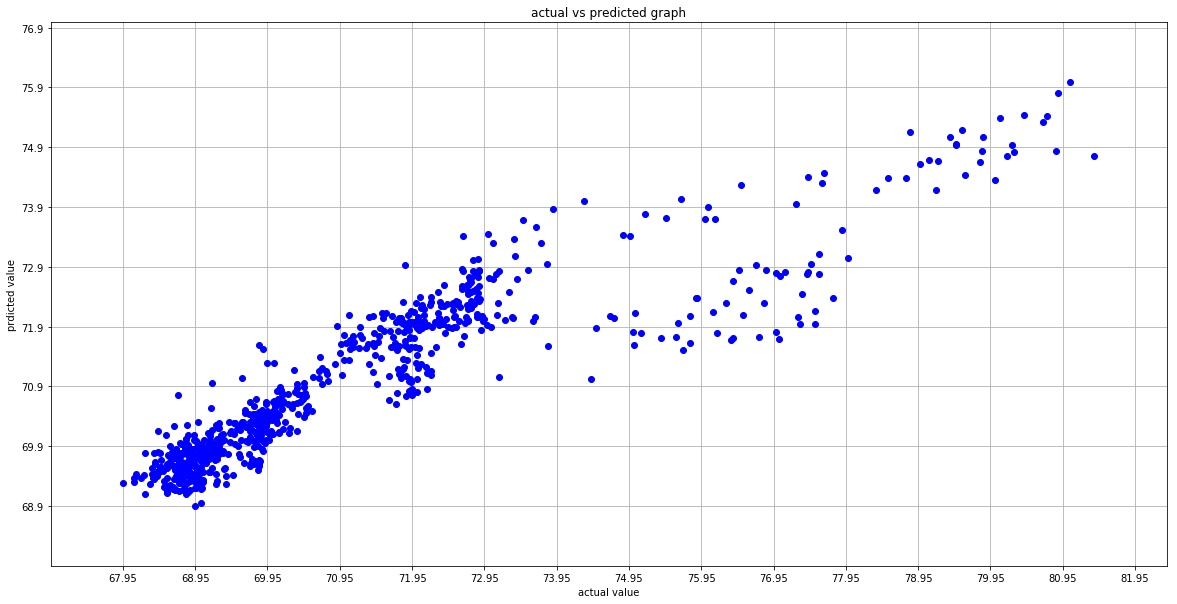

In [54]:
low = 0
high = len(predicted_output)
print('high: ', high)

print('min :', min(test_output[low:high]),' and max: ',max(test_output[low:high]))
print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
plt.plot(test_output[low:high], predicted_output[low:high], 'bo')
plt.xticks(np.arange(min(test_output[low:high]),max(test_output[low:high])+1,1))
plt.yticks(np.arange(min(predicted_output[low:high]),max(predicted_output[low:high])+1,1))
plt.xlim(min(test_output[low:high]-1), max(test_output[low:high])+1)
plt.ylim(min(predicted_output[low:high]-1), max(predicted_output[low:high])+1)
plt.ylabel('prdicted value')
plt.xlabel('actual value')
plt.grid(b=None, which='both', axis='both')
plt.title('actual vs predicted graph')

plt.show()

min : [68.42236064]  and max:  [80.24977979]


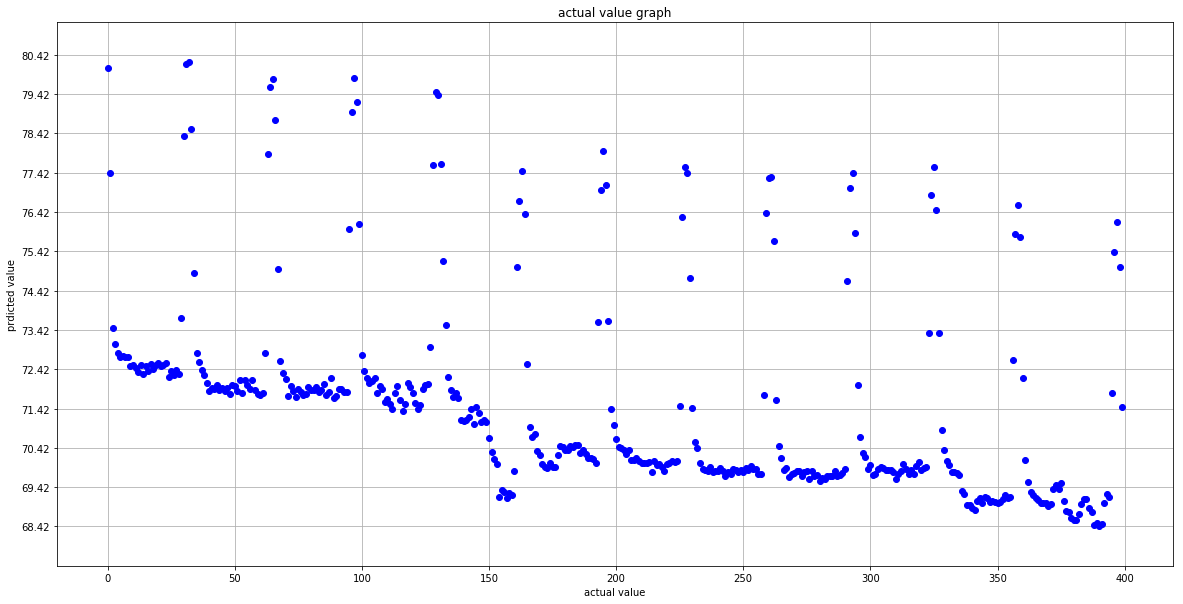

In [55]:
low = 100
high = 500

print('min :', min(test_output[low:high]),' and max: ',max(test_output[low:high]))
# print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
plt.plot(test_output[low:high], 'bo')
# plt.xticks(np.arange(low, high+1,1))
plt.yticks(np.arange(min(test_output[low:high]),max(test_output[low:high])+1,1))

# plt.xlim(min(low, high+1))
plt.ylim(min(test_output[low:high]-1), max(test_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')
plt.grid(b=None, which='both', axis='both')
plt.title('actual value graph')

plt.show()

min : [69.21727]  and max:  [75.989876]


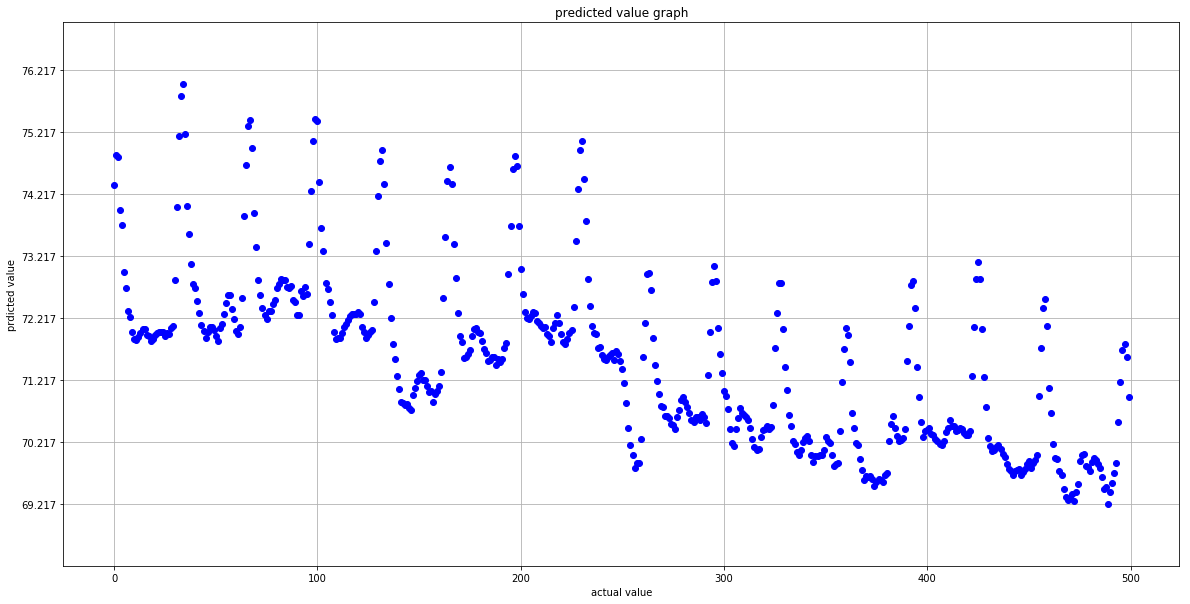

In [56]:
low = 0
high = 500

print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
# print('min :', min(predicted_output[low:high]),' and max: ',max(predicted_output[low:high]))
plt.plot(predicted_output[low:high], 'bo')
# plt.xticks(np.arange(low, high+1,1))
plt.yticks(np.arange(min(predicted_output[low:high]),max(predicted_output[low:high])+1,1))

# plt.xlim(min(low, high+1))
plt.ylim(min(predicted_output[low:high]-1), max(predicted_output[low:high])+1)

plt.ylabel('prdicted value')
plt.xlabel('actual value')
plt.grid(b=None, which='both', axis='both')
plt.title('predicted value graph')

plt.show()

min of predicted_output:  [68.89982]  ,max of predicted_output:  [75.989876]
min of test_output:  [67.94608028]  ,max of test_output:  [81.38228262]


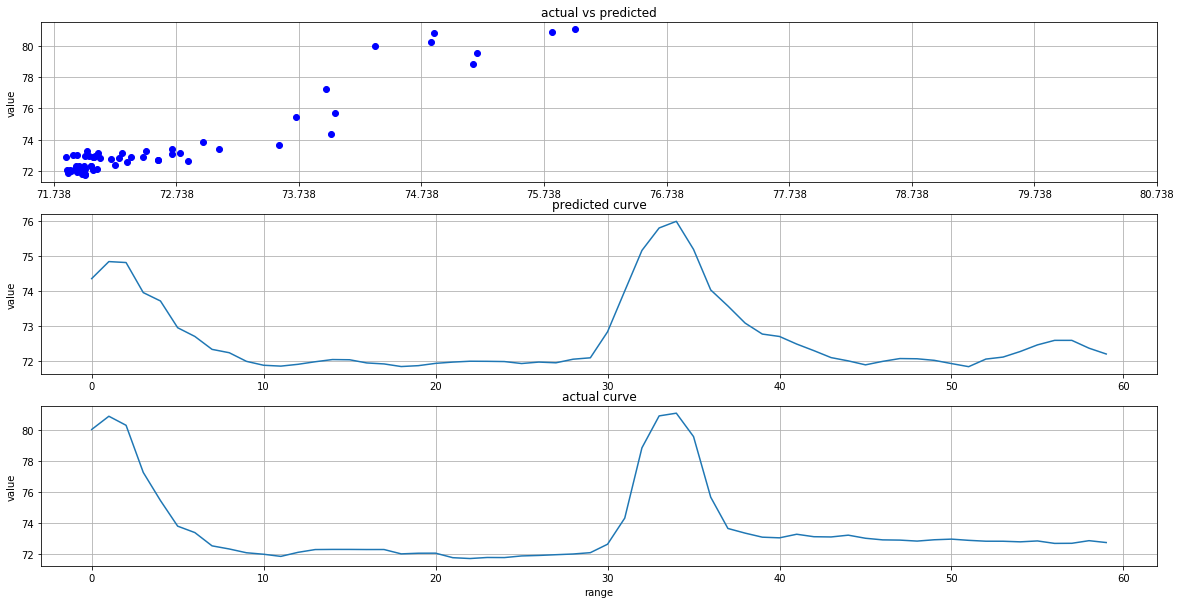

In [57]:
# graph predicted vs actual value
# %matplotlib qt
print('min of predicted_output: ', min(predicted_output),' ,max of predicted_output: ', max(predicted_output))
print('min of test_output: ', min(test_output),' ,max of test_output: ', max(test_output))

plt.subplot(3,1,1)
plt.plot(predicted_output[0:60], test_output[0:60], 'bo')
plt.ylabel('value')
plt.xticks(np.arange(min(test_output[0:60]),max(test_output[0:60]),1))
# plt.yticks(np.arange(min(predicted_output[0:60]),max(predicted_output[0:60]),1))
plt.grid(b=None, which='both', axis='both')
plt.title('actual vs predicted')
# plt.xlim(min(test_output), max(test_output))
# plt.ylim(min(predicted_output), max(predicted_output))
# plt.tick_params(labelsize=10)

plt.subplot(3,1,2)
plt.plot(predicted_output[0:60])
plt.ylabel('value')
plt.grid(b=None, which='both', axis='both')
plt.title('predicted curve')
# plt.tick_params(labelsize=10)

plt.subplot(3,1,3)
plt.plot(test_output[0:60])
plt.ylabel('value')
plt.xlabel('range')
plt.grid(b=None, which='both', axis='both')
plt.title('actual curve')
# plt.tick_params(labelsize=10)

# plt.savefig('predicted_vs_actual_curve.png')
plt.show()

# Do normalize to check the accuracy

In [330]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(multivariate_data_drop_zero)

df_normalized = pd.DataFrame(np_scaled,index=multivariate_data_drop_zero.index,columns=multivariate_column_label)

In [331]:
# dataset=np.array(multivariate_data_mean)
dataset_normalized=np.array(df_normalized)

NumberOfElements_normalized=int(len(dataset_normalized)*0.9)
print('dataset_normalized length: ',len(dataset_normalized))
print('Number of Elements_normalized for training: ',NumberOfElements_normalized)

multiple_ip_train_data_normalized=dataset_normalized[0:NumberOfElements_normalized]
print(multiple_ip_train_data_normalized.shape)
multiple_ip_test_set_normalized=dataset_normalized[NumberOfElements_normalized:len(dataset_normalized)]
print(multiple_ip_test_set_normalized.shape)

dataset_normalized length:  4997
Number of Elements_normalized for training:  4497
(4497, 6)
(500, 6)


In [332]:
n_steps_1 = 4
# split into samples
X_ip_cnn_lstm_normalized, Y_op_cnn_lstm_normalized = split_sequence(multiple_ip_train_data_normalized, n_steps_1)
# reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]

print('X_ip_cnn_lstm_normalized shape: ',X_ip_cnn_lstm_normalized.shape,'\tsize: ',X_ip_cnn_lstm_normalized.size,'\tdimension: ',X_ip_cnn_lstm_normalized.ndim)
print('Y_op_cnn_lstm_normalized shape: ',Y_op_cnn_lstm_normalized.shape,'\tsize: ',Y_op_cnn_lstm_normalized.size,'\tdimension: ',Y_op_cnn_lstm_normalized.ndim)

X_ip_cnn_lstm_normalized shape:  (4493, 4, 5) 	size:  89860 	dimension:  3
Y_op_cnn_lstm_normalized shape:  (4493,) 	size:  4493 	dimension:  1


In [333]:
n_features = X_ip_cnn_lstm_normalized.shape[-1]
n_seq = 2
n_steps_2 = 2
train_ip_cnn_lstm_normalized = X_ip_cnn_lstm_normalized.reshape((X_ip_cnn_lstm_normalized.shape[0], n_seq, n_steps_2, n_features))

In [334]:
print('train_ip_cnn_lstm_normalized shape: ',train_ip_cnn_lstm_normalized.shape,'\tsize: ',
      train_ip_cnn_lstm_normalized.size,'\tdimension: ',train_ip_cnn_lstm_normalized.ndim)

train_ip_cnn_lstm_normalized shape:  (4493, 2, 2, 5) 	size:  89860 	dimension:  4


In [336]:
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def cnn_lstm():
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_steps_2, n_features)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    return model
cnn_lstm_normalized=cnn_lstm()
cnn_lstm_normalized.compile(optimizer='adam', loss='mse',metrics=['accuracy'])

# fit model
cnn_lstm_normalized.fit(train_ip_cnn_lstm_normalized,Y_op_cnn_lstm_normalized,batch_size=batch_size, epochs=epochs, verbose=1,
         callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/cnn_LSTM_norm_30.h5',
                                     save_best_only=True)])

Epoch 1/30
4493/4493 [==============================] - 3s 636us/step - loss: 0.0122 - acc: 0.0000e+00
Epoch 2/30
1376/4493 [========>.....................] - ETA: 0s - loss: 0.0067 - acc: 0.0000e+00

C:\Users\atif\Anaconda3\lib\site-packages\keras\callbacks.py:434: RuntimeWarning: Can save best model only with val_loss available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


4493/4493 [==============================] - 1s 118us/step - loss: 0.0056 - acc: 2.2257e-04
Epoch 3/30
4493/4493 [==============================] - 1s 112us/step - loss: 0.0046 - acc: 2.2257e-04
Epoch 4/30
4493/4493 [==============================] - 0s 110us/step - loss: 0.0039 - acc: 2.2257e-04
Epoch 5/30
4493/4493 [==============================] - 0s 110us/step - loss: 0.0034 - acc: 2.2257e-04
Epoch 6/30
4493/4493 [==============================] - 0s 110us/step - loss: 0.0030 - acc: 2.2257e-04
Epoch 7/30
4493/4493 [==============================] - 1s 118us/step - loss: 0.0029 - acc: 2.2257e-04
Epoch 8/30
4493/4493 [==============================] - 1s 126us/step - loss: 0.0028 - acc: 2.2257e-04
Epoch 9/30
4493/4493 [==============================] - 1s 128us/step - loss: 0.0027 - acc: 2.2257e-04
Epoch 10/30
4493/4493 [==============================] - 0s 110us/step - loss: 0.0027 - acc: 2.2257e-04
Epoch 11/30
4493/4493 [==============================] - 1s 114us/step - loss: 0.00

In [337]:
X_CNN_Lstm_test_normalized, y_CNN_Lstm_test_normalized = split_sequence(multiple_ip_test_set_normalized, n_steps_1)

x_input_normalized = X_CNN_Lstm_test_normalized.reshape((X_CNN_Lstm_test_normalized.shape[0], n_seq, n_steps_2, X_CNN_Lstm_test_normalized.shape[-1]))

print(x_input_normalized.shape)

yhat_normalized = cnn_lstm_normalized.predict(x_input_normalized, verbose=1)

(496, 2, 2, 5)
496/496 [==============================] - 1s 1ms/step


mean squared error:  0.008435432140708278
RMSE Error:  0.09184460866435372


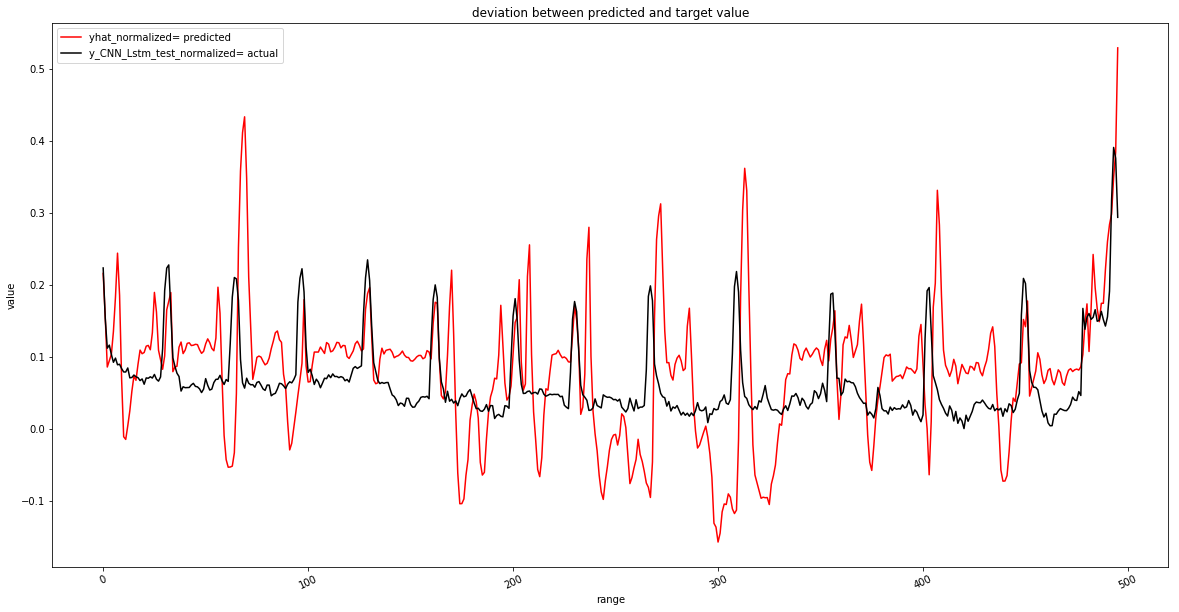

In [338]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(y_CNN_Lstm_test_normalized,yhat_normalized)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))

# my_data_1.index[0:-1]
plt.plot(yhat_normalized,color='red')
plt.plot(y_CNN_Lstm_test_normalized,color='black')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['yhat_normalized= predicted', 'y_CNN_Lstm_test_normalized= actual'], loc='upper left')
# plt.rcParams['figure.figsize'] =(20,10)
plt.show()

# Unnormalize data to test

In [342]:
# finding max value from each column
max_array=[]
i=0
for idx,val in enumerate(list(multivariate_data_drop_zero.columns)):
    x=multivariate_data_drop_zero[val].max()
    q=[val,x]
    max_array.append(q)

In [343]:
max_array

[['DEWIHOBT9_I0', 100.0],
 ['AEDATZ_HO_V0', 61.94729716820025],
 ['RWWIHOB_HWT0', 98.14219609603451],
 ['RWWIHOB_MWT0', 98.22370624880494],
 ['AEWIHO_T9AV2', 98.55385680130868],
 ['AEDAHO_T9_V2', 92.06695562021443]]

In [344]:
target_column_max_value=max_array[-1][-1]

In [345]:
target_column_max_value

92.06695562021443

In [346]:
unnormalized_yhat=yhat_normalized*target_column_max_value
unnormalized_y_CNN_Lstm_test=y_CNN_Lstm_test_normalized*target_column_max_value

In [348]:
print(unnormalized_yhat.shape)
print(unnormalized_y_CNN_Lstm_test.shape)

(496, 1)
(496,)


In [351]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(unnormalized_y_CNN_Lstm_test[0:100],unnormalized_yhat[0:100])
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
Error_1 = mean_absolute_error(unnormalized_y_CNN_Lstm_test[0:100],unnormalized_yhat[0:100])
print('Mean Absolute Error: ',Error_1)

mean squared error:  82.45130103963596
RMSE Error:  9.080269877026561
Mean Absolute Error:  6.572370204256023


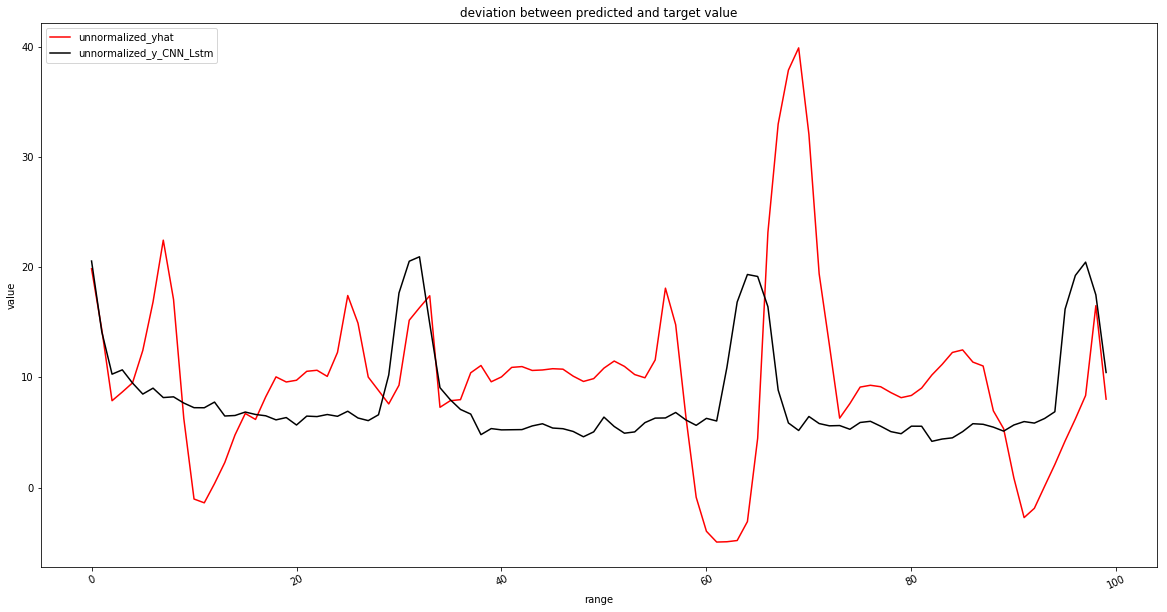

In [352]:
plt.plot(unnormalized_yhat[0:100],color='red')
plt.plot(unnormalized_y_CNN_Lstm_test[0:100],color='black')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['unnormalized_yhat', 'unnormalized_y_CNN_Lstm'], loc='upper left')
plt.show()

In [356]:
def do_reshape(ready_ip_1):
    global n_seq,n_steps_2
    x_input = ready_ip_1.reshape((ready_ip_1.shape[0], n_seq, n_steps_2, ready_ip_1.shape[-1]))
    return x_input

def make_test_set(start,end,multivariate_column_label):
    global test_new
    test_dataset=test_new.iloc[start:end][multivariate_column_label]
    test_dataset=test_dataset.loc[::-1]
    mean_value=test_dataset.mean()
    test_dataset_mean= test_dataset.replace(0,mean_value)
    global min_max_scaler
    np_scaled_1 = min_max_scaler.fit_transform(test_dataset_mean)
    df_normalized_1 = pd.DataFrame(np_scaled_1,columns=multivariate_column_label)
    df_normalized_2=np.array(df_normalized_1)
    ready_ip,ready_op=split_sequence(df_normalized_2,n_steps_1)
    reshaped_input=do_reshape(ready_ip)
    
    return test_dataset_mean,reshaped_input,ready_op


mean_data,reshaped_ip,real_op=make_test_set(18000,20000,multivariate_column_label)

my_data_array=np.array(norm_data)
# ready_ip,ready_op=split_sequence(my_data_array,n_steps_1)

# reshaped_input=do_reshape(ready_ip)

NameError: name 'norm_data' is not defined

In [354]:
mean_data.head()

,DEWIHOBT9_I0,AEDATZ_HO_V0,RWWIHOB_HWT0,RWWIHOB_MWT0,AEWIHO_T9AV2,AEDAHO_T9_V2
dateTime,,,,,,
2019-03-20 14:00:00,100.0,58.849192,94.396188,95.335312,82.164653,80.655537
2019-03-20 14:01:00,100.0,59.596989,94.341811,95.239170,84.719391,81.089756
2019-03-20 14:02:00,100.0,57.521160,94.311420,95.184683,85.343840,80.335200
2019-03-20 14:03:00,100.0,55.506700,94.240242,95.167058,85.319617,75.924448
2019-03-20 14:04:00,100.0,54.717202,94.092291,95.045271,84.241223,73.998452


In [355]:
print(reshaped_input.shape)

NameError: name 'reshaped_input' is not defined

In [ ]:
maximum_val=real_op.max()
print(maximum_val)
yhat_new=cnn_lstm.predict(reshaped_input, verbose=1)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(real_op,yhat_new)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
Error_1 = mean_absolute_error(real_op,yhat_new)
print('Mean Absolute Error: ',Error_1)

In [ ]:
plt.plot(yhat_new,color='green')
plt.plot(real_op,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['predicted_op', 'actual_op'], loc='upper left')
plt.show()

In [ ]:
# finding max value from each column
max_array_1=[]
i=0
for idx,val in enumerate(list(multivariate_data_mean.columns)):
    x=mean_data[val].max()
    q=[val,x]
    max_array_1.append(q)

In [ ]:
max_array_1

In [ ]:
target_max=max_array_1[-1][-1]

In [ ]:
unnormalized_prdicted=yhat_new*target_max
unnormalized_actual_op=real_op*target_max

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

#Print MSE to see how good the model is
Error = mean_squared_error(unnormalized_actual_op,unnormalized_prdicted)
print('mean squared error: ',Error)
print('RMSE Error: ',sqrt(Error))
Error_1 = mean_absolute_error(unnormalized_actual_op,unnormalized_prdicted)
print('Mean Absolute Error: ',Error_1)

In [ ]:
plt.plot(unnormalized_prdicted,color='green')
plt.plot(unnormalized_actual_op,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['predicted_op', 'actual_op'], loc='upper left')
plt.show()